In [ ]:
%tensorflow_version 1.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional,BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import  to_categorical
%matplotlib inline

In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
def clean_text(text):
    
    text=re.sub(r"[^a-zA-Z]"," ",text)
    text=text.lower()
    #text=re.sub(r"[0-9]","",text)
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"[-()\"#/@;:<>{}+=~|.?,]","",text)
    word_tokens = word_tokenize(text)
    filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if w not in stopwords]
    text=" ".join(filtered_sentence)
    return text
f = "The computer runs on a three-step cycle namely input, process, and output. Also, the computer follows this cycle in every process it was asked to do. In simple words, the process can be explained in this way. The data which we feed into the computer is input, the work CPU do is process and the result which the computer give is output.The simple computer basically consists of CPU, monitor, mouse, and keyboard. Also, there are hundreds of other computer parts that can be attached to it. These other "

# **Pre-Processing**
This is the first and vey important step of the algorithm and it does the preprocessing of the data. It converts I'am to I am ,Don't to Do not and so on.

In [ ]:
url='https://raw.githubusercontent.com/Prrriyanka/automatedessaygrading/master/actual%20dataset.csv'
testurl = "https://raw.githubusercontent.com/Nehaaamishra/dv/master/Untitled%20spreadsheet%20-%20Sheet1.csv"
train = pd.read_csv(url)


In [ ]:
train.head()

,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1.0,0,3,1,1,1.0,1.0,1.0,average,worst,additional information would need replicate ex...
1,3,1.0,0,3,1,1,1.0,1.0,1.5,worst,above_average,need trial control set exact amount vinegar po...
2,4,1.0,0,3,0,0,0.0,0.0,1.0,worst,worst,student list rock better rock worse procedure
3,5,1.0,0,3,2,2,2.0,2.5,1.0,above_average,worst,student able make replicate would need tell us...
4,6,1.0,0,3,1,0,0.0,0.0,0.0,worst,worst,would need information would let different sam...


Th dataset is loaded into the system!

In [ ]:
train['avg_score']=np.round((train.score_1+train.score_2+train.score_3)/3)

We take average of the 4 human graded scores ad put it into the system to train

In [ ]:
train2=train.drop(columns=['ID','Essayset','min_score','max_score','clarity','coherent'])

In [ ]:
train.drop(columns=['score_1','score_2','score_3','score_4','score_5'],inplace=True)

In [ ]:
train.head()

,ID,Essayset,min_score,max_score,clarity,coherent,EssayText,avg_score
0,1,1.0,0,3,average,worst,additional information would need replicate ex...,1.0
1,3,1.0,0,3,worst,above_average,need trial control set exact amount vinegar po...,1.0
2,4,1.0,0,3,worst,worst,student list rock better rock worse procedure,0.0
3,5,1.0,0,3,above_average,worst,student able make replicate would need tell us...,2.0
4,6,1.0,0,3,worst,worst,would need information would let different sam...,0.0


In [ ]:
train2.head()

,score_1,score_2,score_3,score_4,score_5,EssayText,avg_score
0,1,1,1.0,1.0,1.0,additional information would need replicate ex...,1.0
1,1,1,1.0,1.0,1.5,need trial control set exact amount vinegar po...,1.0
2,0,0,0.0,0.0,1.0,student list rock better rock worse procedure,0.0
3,2,2,2.0,2.5,1.0,student able make replicate would need tell us...,2.0
4,1,0,0.0,0.0,0.0,would need information would let different sam...,0.0


In [ ]:
max_words = 2500
max_len = 50
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train2.EssayText)
sequences = tok.texts_to_sequences(train2.EssayText)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print(sequences_matrix)
Y1=train2.avg_score

[[   0    0    0 ...   26  415   52]
 [   0    0    0 ...  439  785  316]
 [   0    0    0 ...  734 1756  121]
 ...
 [   0    0    0 ...  267  181  130]
 [   0    0    0 ...  267   65   58]
 [   0    0    0 ...  399   43   82]]


# Tokenization and Stemming
we have defined maximum length as 2500 i.e. system can take essays wih input upto 2500 words.
In this section we try to divide the whole essay into tokens. After generating the tokens A matrx known as sequence matrix is generated to be fed in the model.



In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(sequences_matrix,to_categorical(Y1),test_size=0.20)


#Splitting the data
Here, we split the data into training part and testing part. test_size is 0.2 which deites that 20% of data will be used to test the accuracy of the model.

Now , in the training part we put the tokenized matrix on x axis and on y axis we put the average score. italicized text

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = Bidirectional(LSTM(64))(layer)
    #layer = Bidirectional(LSTM(128))(layer)
    layer = Dense(64,name='FC1')(layer)
    #layer=BatchNormalization()(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(64,name='FC2')(layer)
    #layer=BatchNormalization()(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

 #RNN Explaination 
 a recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed graph along a sequence. This allows it to exhibit dynamic temporal behavior for a time sequence. Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.
Recurrent Neural Network comes into the picture when any model needs context to be able to provide the output based on the input.
Sometimes the context is the single most important thing for the model to predict the most appropriate output.
Let’s understand this by an analogy. Suppose you are watching a movie, you keep watching the movie as at any point in time, you have the context because you have seen the movie until that point, then only you are able to relate everything correctly. It means that you remember everything that you have watched.
Similarly, RNN remembers everything. In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other. Let’s say you have to predict the next word in a given sentence, in that case, the relation among all the previous words helps in predicting the better output. The RNN remembers all these relations while training itself.
In order to achieve it, the RNN creates the networks with loops in them, which allows it to persist the information.

#Model Defining and Reshaping

Here We have created the model 
Calculate the loss using categorical loss entropy function 
used RMSprop optimizer to reduce the loss and train our rnn for 2 epochs

In [ ]:
model = RNN()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=64,epochs=2,validation_data=(X_test,Y_test))


Train on 12937 samples, validate on 3235 samples
Epoch 1/2
12937/12937 [==============================] - 18s 1ms/step - loss: 0.9917 - accuracy: 0.5443 - val_loss: 0.8782 - val_accuracy: 0.6046
Epoch 2/2
12937/12937 [==============================] - 17s 1ms/step - loss: 0.7985 - accuracy: 0.6621 - val_loss: 0.8137 - val_accuracy: 0.6485


#Categorical Cross Entropy

Categorical crossentropy is a loss function that is used for single label categorization. This is when only one category is applicable for each data point. In other words, an example can belong to one class only. The block before the Target block must use the activation function ​Softmax.


In [ ]:
y_pred_train=model.predict(sequences_matrix)

In [ ]:
tt1=pd.DataFrame(y_pred_train,columns=['out1','out2','out3','out4'])
train3=train.drop(columns=['ID','min_score','max_score','EssayText'])

In [ ]:
train4=pd.concat([train3,tt1],axis=1)

In [ ]:
train4.head()

,Essayset,clarity,coherent,avg_score,out1,out2,out3,out4
0,1.0,average,worst,1.0,0.111142,0.251085,0.432755,0.205018
1,1.0,worst,above_average,1.0,0.488291,0.272394,0.181598,0.057717
2,1.0,worst,worst,0.0,0.801796,0.153187,0.040624,0.004392
3,1.0,above_average,worst,2.0,0.123881,0.276969,0.431927,0.167223
4,1.0,worst,worst,0.0,0.724592,0.173911,0.084627,0.016870


As you can see there are 4 outputs Out1 , Out2, Out3 and Out4 which indicate probability of each score.

> Indented block

1.   List item

1.   List item

1.   List item

1.   List item
2.   List item


2.   List item


2.   List item


2.   List item





Category encoders are used to convert the categorical
value of clarity and coherence columns into numeric value
which fits into the model.

In [ ]:
!pip install category_encoders
import category_encoders as ce


     |████████████████████████████████| 102kB 2.3MB/s 


In [ ]:
ce1=ce.TargetEncoder(cols = ['Essayset','clarity','coherent'], min_samples_leaf = 20)

In [ ]:
train4.loc[:,['Essayset','clarity','coherent']]=ce1.fit_transform(train4.loc[:,['Essayset','clarity','coherent']],train4.loc[:,['avg_score']])

In [ ]:
train4.head()

,Essayset,clarity,coherent,avg_score,out1,out2,out3,out4
0,1.480649,0.496662,0.482423,1.0,0.111142,0.251085,0.432755,0.205018
1,1.480649,0.486640,1.944411,1.0,0.488291,0.272394,0.181598,0.057717
2,1.480649,0.486640,0.482423,0.0,0.801796,0.153187,0.040624,0.004392
3,1.480649,1.943451,0.482423,2.0,0.123881,0.276969,0.431927,0.167223
4,1.480649,0.486640,0.482423,0.0,0.724592,0.173911,0.084627,0.016870


In [ ]:
X1=train4.drop(columns=['avg_score'])
Y1=train4.avg_score

eXtreme Gradient Boosting (XGBoost) is used which is a scalable and accurate implementation of gradient boosting machines and it has proven to push the limits of computing power for boosted trees algorithms.












In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=4,
              
                 min_child_weight=0.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=123)

In [ ]:
xgb.fit(X1_train,Y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=0.5, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.6, verbosity=1)

In [ ]:
yy_test=xgb.predict(X1_test)

In [ ]:
from sklearn.metrics import  accuracy_score,classification_report

In [ ]:
accuracy_score(Y1_test,yy_test)

0.7935085007727976

In [ ]:
print(classification_report(Y1_test,yy_test))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1309
         1.0       0.75      0.71      0.73      1053
         2.0       0.80      0.82      0.81       749
         3.0       0.56      0.48      0.52       124

    accuracy                           0.79      3235
   macro avg       0.74      0.72      0.73      3235
weighted avg       0.79      0.79      0.79      3235



In [ ]:
test=pd.read_csv(testurl)

In [ ]:
test2=test.drop(columns=['ID','min_score','max_score'])

In [ ]:
test2.head()

,Essayset,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1,1,1.0,1.0,1.0,average,worst,additional information would need replicate ex...
1,1,1,1,1.0,1.0,1.5,worst,above_average,need trial control set exact amount vinegar po...
2,1,0,0,0.0,0.0,1.0,worst,worst,student list rock better rock worse procedure
3,1,2,2,2.0,2.5,1.0,above_average,worst,student able make replicate would need tell us...
4,1,1,0,0.0,0.0,0.0,worst,worst,would need information would let different sam...


In [ ]:
test2['EssayText']=test2['EssayText'].apply(clean_text)

In [ ]:
sequences_test = tok.texts_to_sequences(test2.EssayText)
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)


In [ ]:
test2_test=model.predict(sequences_matrix_test)

In [ ]:
testdf=pd.DataFrame(test2_test,columns=['out1','out2','out3','out4'])

In [ ]:
test3=pd.concat([test2,testdf],axis=1)

In [ ]:
test3.drop(columns=['EssayText'],inplace=True)
test3.head()

,Essayset,score_1,score_2,score_3,score_4,score_5,clarity,coherent,out1,out2,out3,out4
0,1,1,1,1.0,1.0,1.0,average,worst,0.111142,0.251085,0.432755,0.205018
1,1,1,1,1.0,1.0,1.5,worst,above_average,0.488291,0.272394,0.181598,0.057717
2,1,0,0,0.0,0.0,1.0,worst,worst,0.801796,0.153187,0.040624,0.004392
3,1,2,2,2.0,2.5,1.0,above_average,worst,0.123881,0.276969,0.431927,0.167223
4,1,1,0,0.0,0.0,0.0,worst,worst,0.724592,0.173911,0.084627,0.016870


In [ ]:

test.head()


,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1,0,3,1,1,1.0,1.0,1.0,average,worst,additional information would need replicate ex...
1,3,1,0,3,1,1,1.0,1.0,1.5,worst,above_average,need trial control set exact amount vinegar po...
2,4,1,0,3,0,0,0.0,0.0,1.0,worst,worst,student list rock better rock worse procedure
3,5,1,0,3,2,2,2.0,2.5,1.0,above_average,worst,student able make replicate would need tell us...
4,6,1,0,3,1,0,0.0,0.0,0.0,worst,worst,would need information would let different sam...


In [ ]:
test3.loc[:,['Essayset','clarity','coherent']]=ce1.transform(test3.loc[:,['Essayset','clarity','coherent']])

In [ ]:
test3.drop(columns=['score_1','score_2','score_3','score_4','score_5'],inplace=True)

test3.head()


,Essayset,clarity,coherent,out1,out2,out3,out4
0,1.480649,0.496662,0.482423,0.111142,0.251085,0.432755,0.205018
1,1.480649,0.486640,1.944411,0.488291,0.272394,0.181598,0.057717
2,1.480649,0.486640,0.482423,0.801796,0.153187,0.040624,0.004392
3,1.480649,1.943451,0.482423,0.123881,0.276969,0.431927,0.167223
4,1.480649,0.486640,0.482423,0.724592,0.173911,0.084627,0.016870


In [ ]:
final_out=xgb.predict(test3)

In [ ]:
out=pd.DataFrame()


In [ ]:
out['id']=test.ID
out['essay_set']=test.Essayset


In [ ]:
out['essay_score']=final_out
out.tail()

,id,essay_set,essay_score
4,6,1,0.0
5,7,1,0.0
6,8,1,3.0
7,9,1,3.0
8,10,1,2.0


In [ ]:
out.to_csv('SCORES.csv',index=None)
nn=pd.read_csv('SCORES.csv')

In [ ]:
nn.head(10)

,id,essay_set,essay_score
0,1,1,1.0
1,3,1,1.0
2,4,1,0.0
3,5,1,2.0
4,6,1,0.0
5,7,1,0.0
6,8,1,3.0
7,9,1,3.0
8,10,1,2.0


In [ ]:
#absolute_path = os.path.abspath(os.path.dirname('output.csv'))


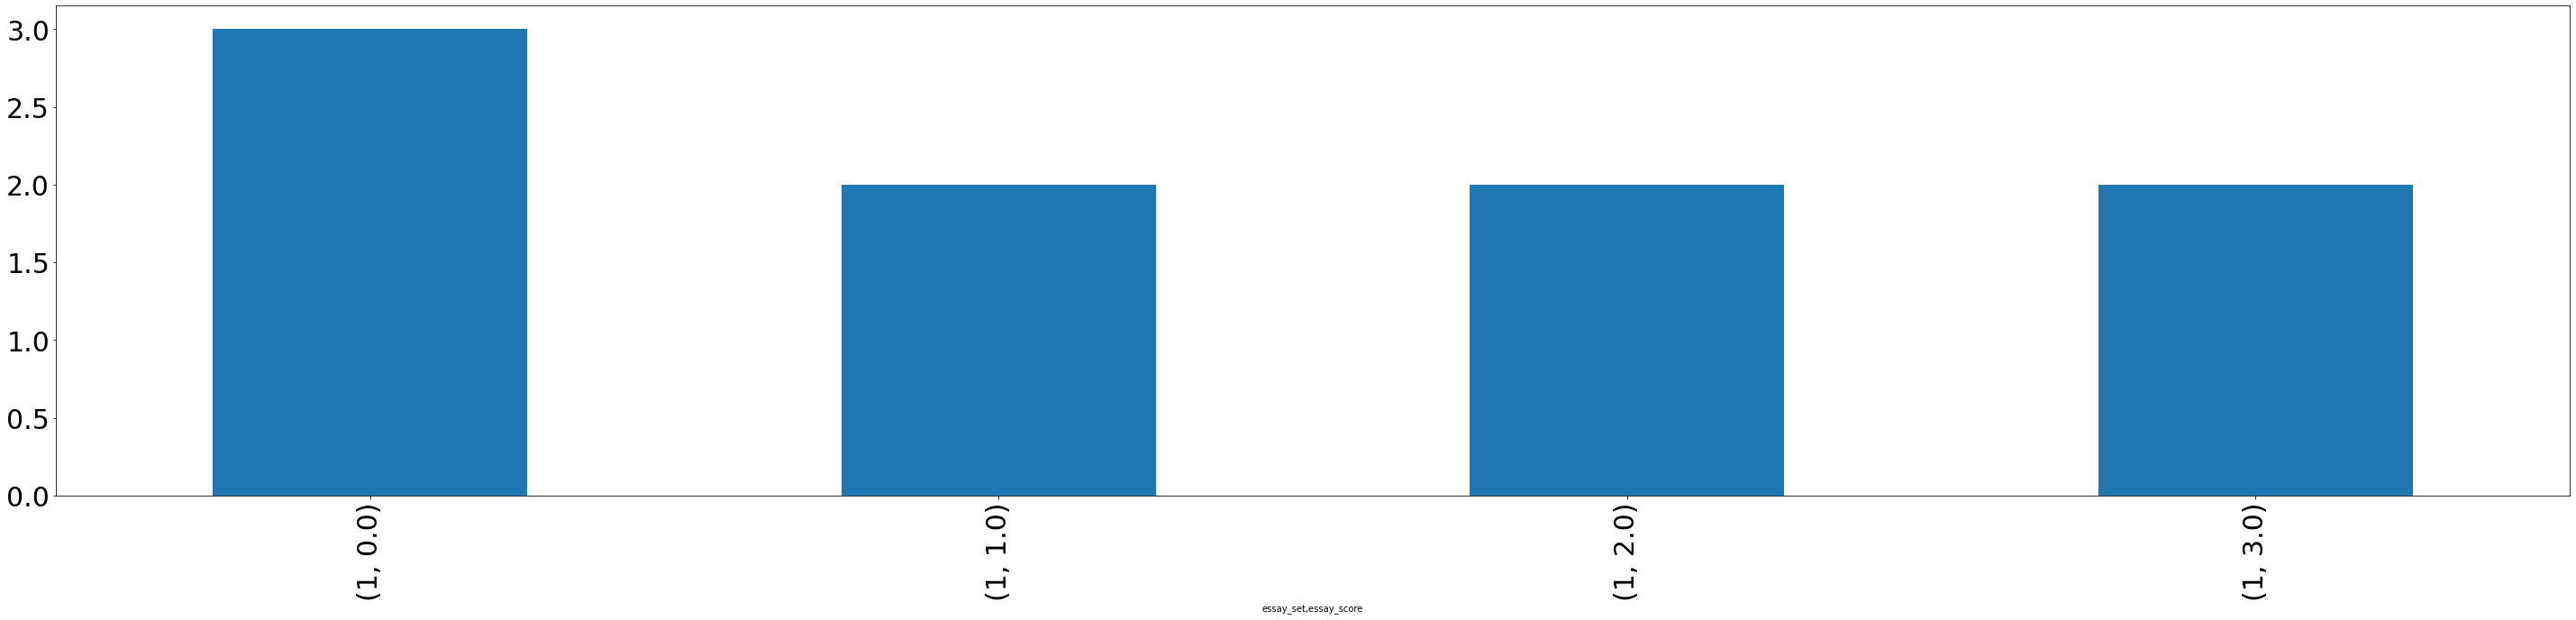

In [ ]:
out.groupby('essay_set').essay_score.value_counts().plot(kind='bar',figsize=(50,10),fontsize=30)
from google.colab import files
files.download("SCORES.csv")